In [1]:
# Thu Vien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import statistics
from recommenders.utils.timer import Timer
from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor

c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\pandera\_pandas_deprecated.py:157: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [2]:
# Load du lieu movieLens 100k
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)
df = df[["userId", "movieId", "rating"]] # Chon 3 cot userId, movieId, rating
df.head()

100%|██████████| 4.81k/4.81k [00:12<00:00, 391KB/s]


,userId,movieId,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [3]:
# Mã hóa userId và movieId
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])

In [4]:
#Chuẩn bị dữ liệu X và y
X = df[['userId_enc', 'movieId_enc']]
y = df['rating']


In [5]:
# Chuẩn hóa dữ liệu
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
df_standard = pd.DataFrame(X_standard, columns=["userId_enc", "movieId_enc"])
print("\nDu lieu sau khi chuan hoa Z-score:")
print(df_standard.head())


Du lieu sau khi chuan hoa Z-score:
   userId_enc  movieId_enc
0   -0.999519    -0.554812
1   -1.037026    -0.373432
2   -1.652150    -0.146707
3   -0.819482    -1.132206
4   -1.112041    -0.240420


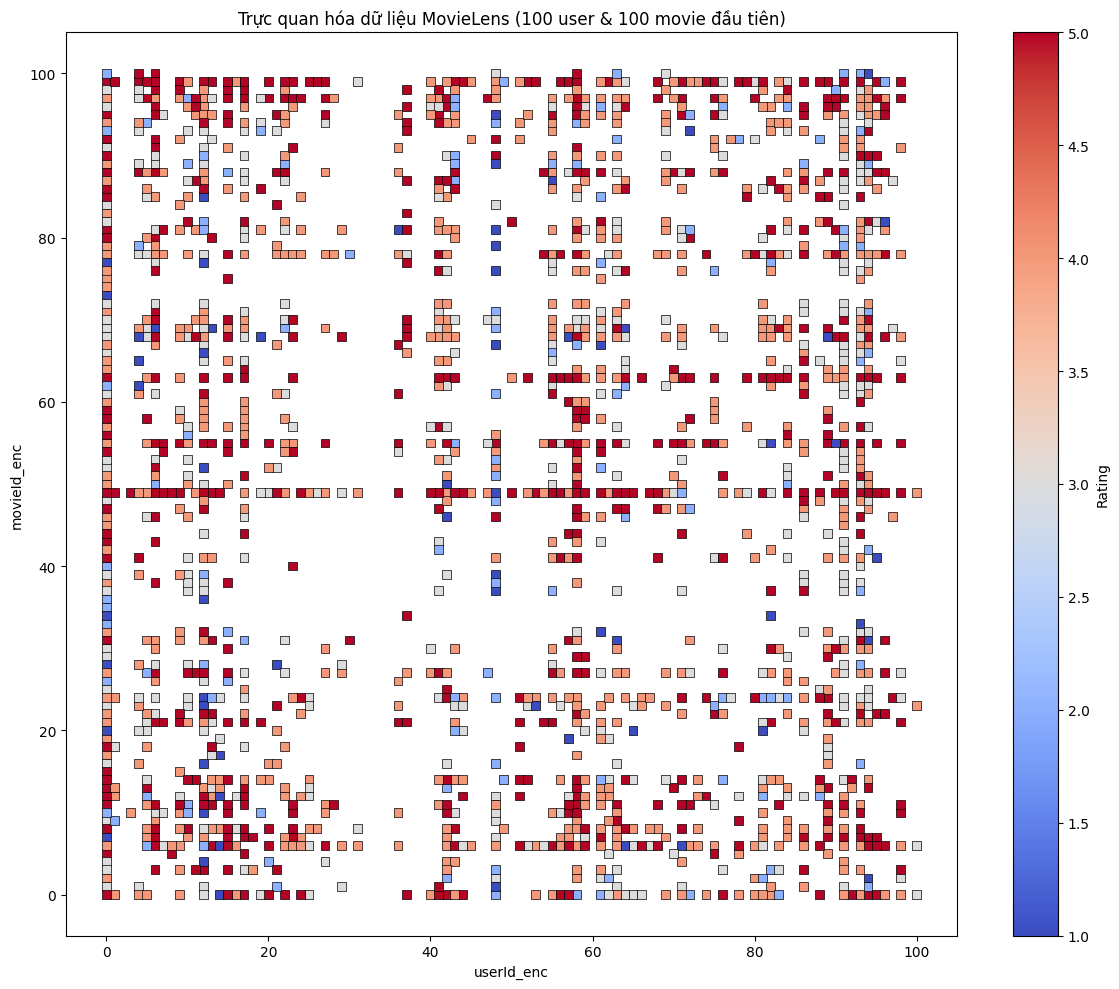

In [ ]:
import matplotlib.pyplot as plt

# Lọc dữ liệu: chỉ lấy 100 userId_enc và 100 movieId_enc đầu tiên
filtered_df = df[
    (df['userId_enc'] <= 100) &
    (df['movieId_enc'] <= 100)
]

# Vẽ scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(filtered_df['userId_enc'], filtered_df['movieId_enc'],
            c=filtered_df['rating'], cmap='coolwarm', s=40, marker='s', edgecolors='black',
    linewidths=0.5)
plt.colorbar(label='Rating')
plt.title("Trực quan hóa dữ liệu MovieLens (100 user & 100 movie đầu tiên)")
plt.xlabel("userId_enc")
plt.ylabel("movieId_enc")
plt.tight_layout()
plt.show()


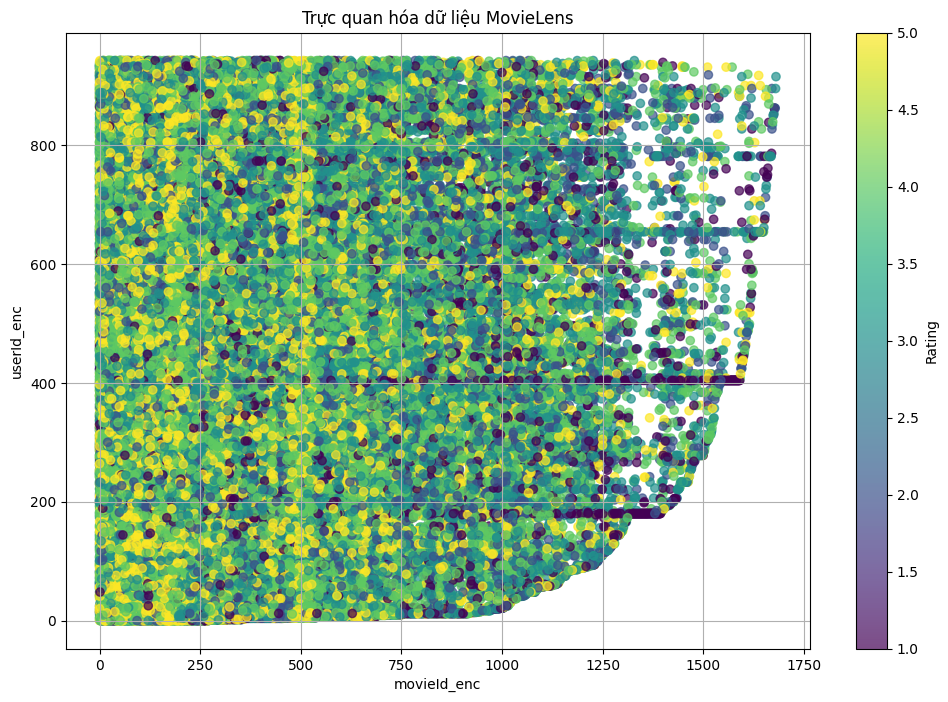

In [16]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['movieId_enc'], 
    df['userId_enc'], 
    c=df['rating'], 
    cmap='viridis', 
    alpha=0.7
)

plt.colorbar(scatter, label='Rating')
plt.xlabel('movieId_enc')
plt.ylabel('userId_enc')
plt.title('Trực quan hóa dữ liệu MovieLens')
plt.grid(True)
plt.show()

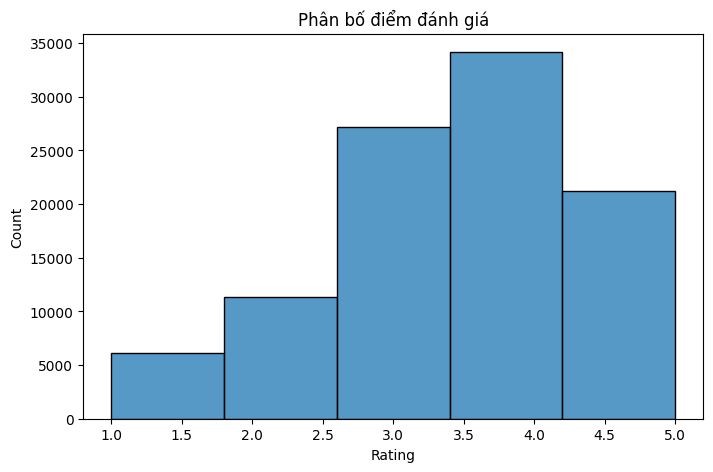

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ phân bố điểm đánh giá
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=False)  # bins=5 vì rating 1-5
plt.title("Phân bố điểm đánh giá")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [17]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Huấn luyện mô hình Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")


MAE  = 0.8235
MSE  = 1.0384
RMSE = 1.0190


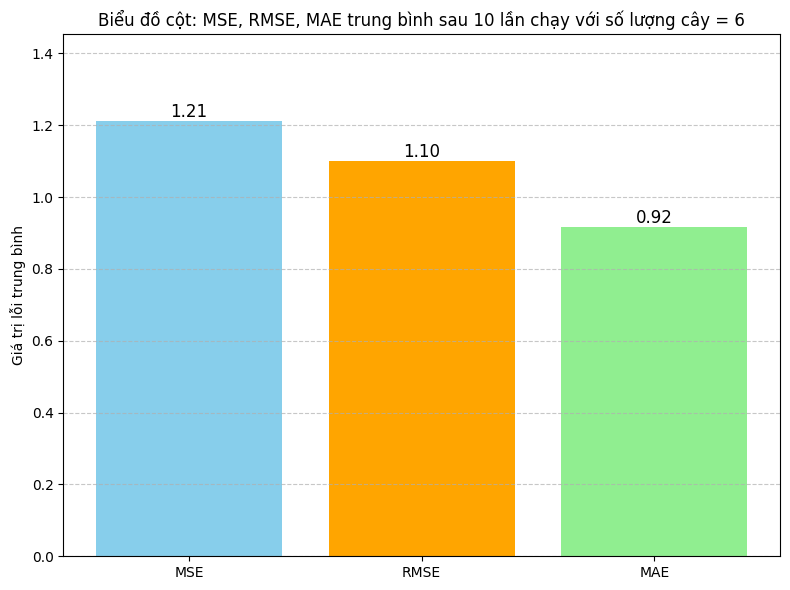

n_estimators = 6
Train Time: 0.3355450391769409
Test Time: 0.036632204055786134
Trung binh: RMSE = 1.1003 | MAE = 0.9175 | MSE = 1.2107


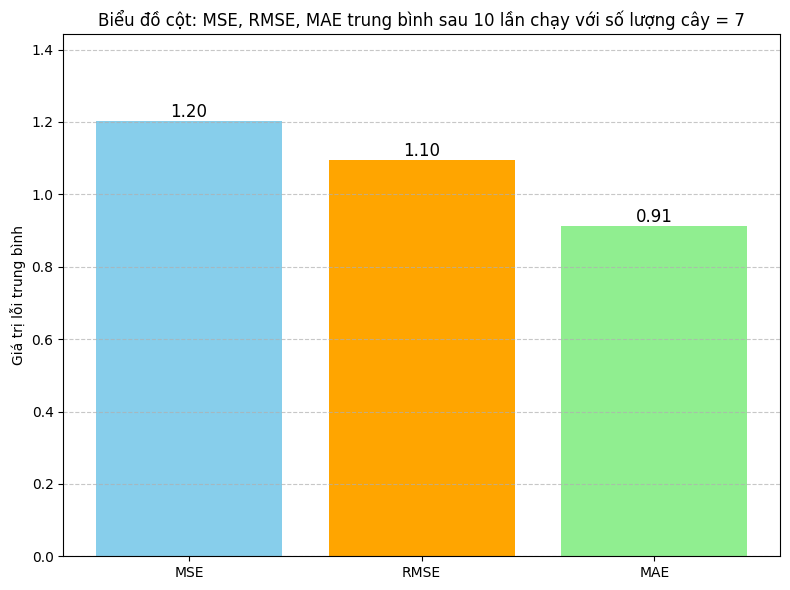

n_estimators = 7
Train Time: 0.26078765392303466
Test Time: 0.02789623737335205
Trung binh: RMSE = 1.0962 | MAE = 0.9128 | MSE = 1.2016


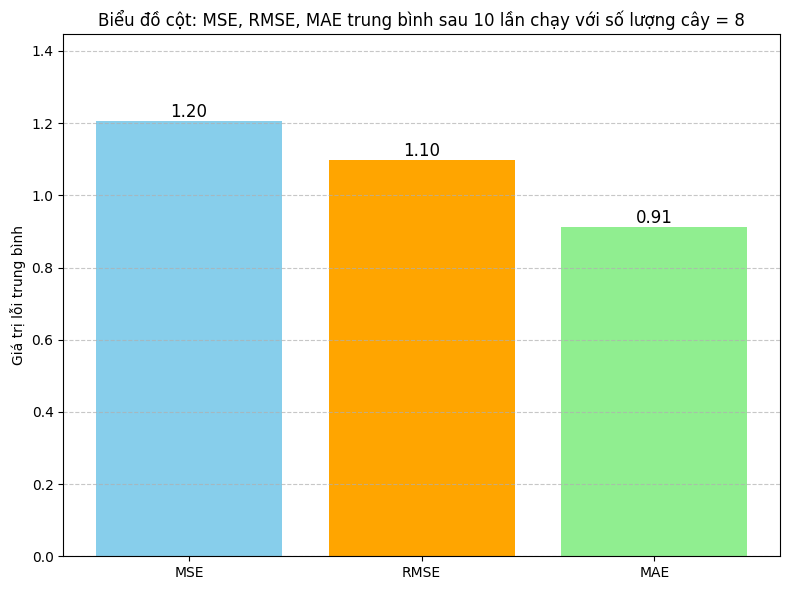

n_estimators = 8
Train Time: 0.21870863437652588
Test Time: 0.01510477066040039
Trung binh: RMSE = 1.0977 | MAE = 0.9129 | MSE = 1.2049


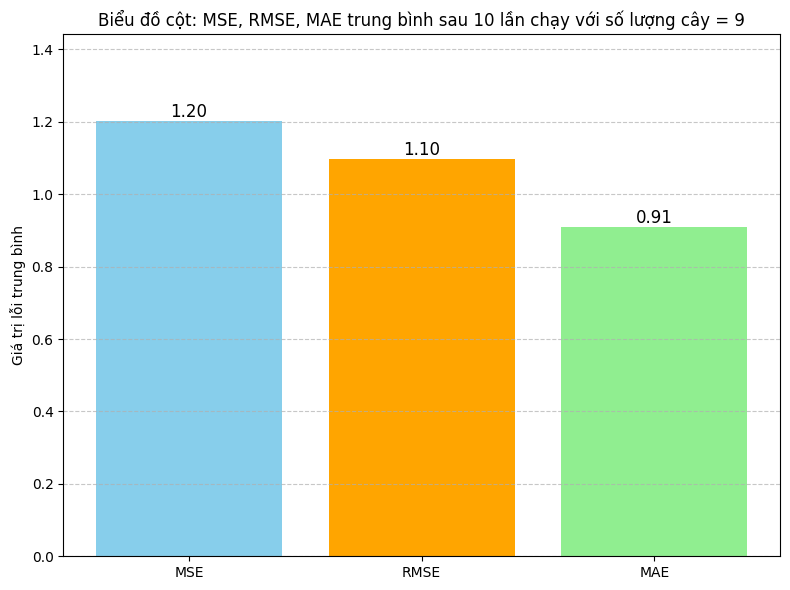

n_estimators = 9
Train Time: 0.2750972509384155
Test Time: 0.026743316650390626
Trung binh: RMSE = 1.0960 | MAE = 0.9095 | MSE = 1.2011


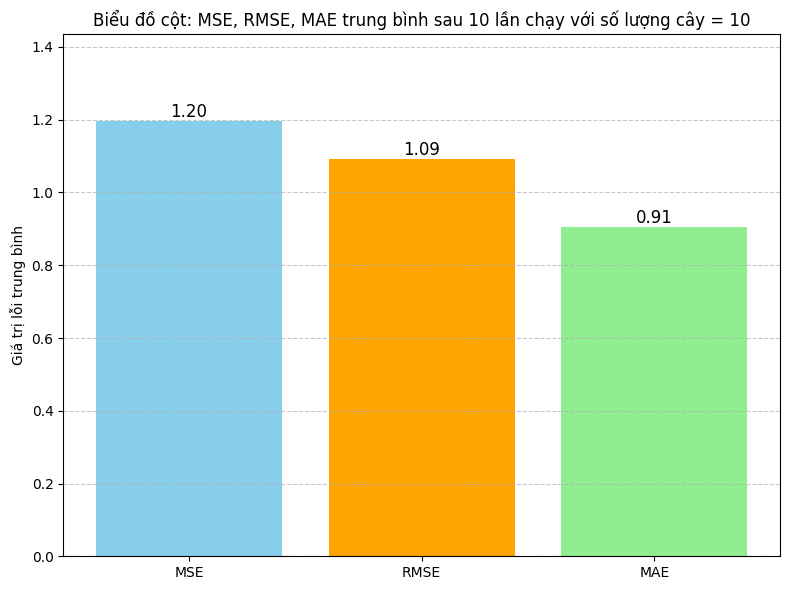

n_estimators = 10
Train Time: 0.2791280269622803
Test Time: 0.01715531349182129
Trung binh: RMSE = 1.0934 | MAE = 0.9061 | MSE = 1.1955


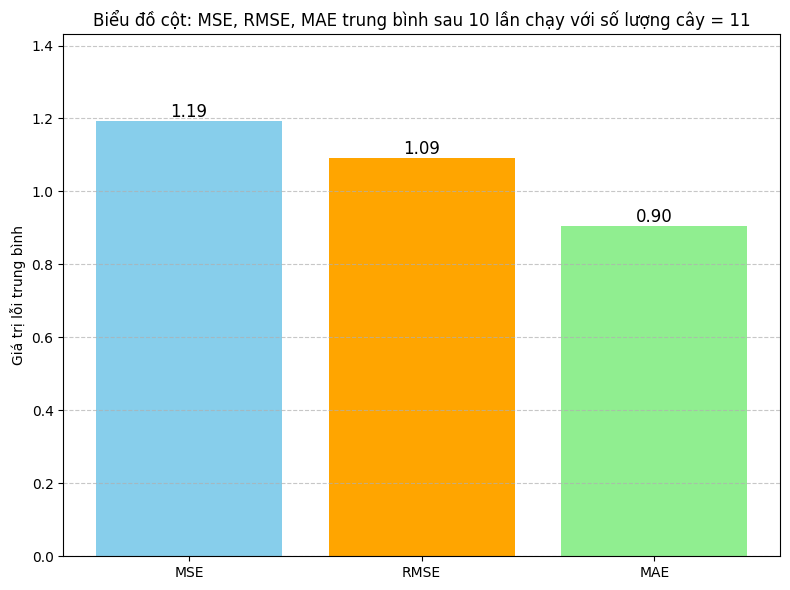

n_estimators = 11
Train Time: 0.2888463497161865
Test Time: 0.01766359806060791
Trung binh: RMSE = 1.0918 | MAE = 0.9041 | MSE = 1.1921


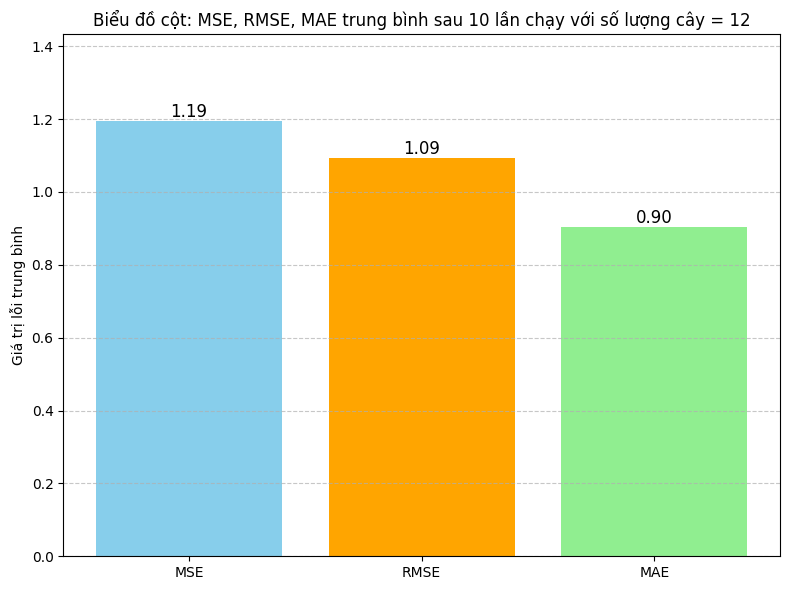

n_estimators = 12
Train Time: 0.3603774309158325
Test Time: 0.02483501434326172
Trung binh: RMSE = 1.0925 | MAE = 0.9036 | MSE = 1.1937


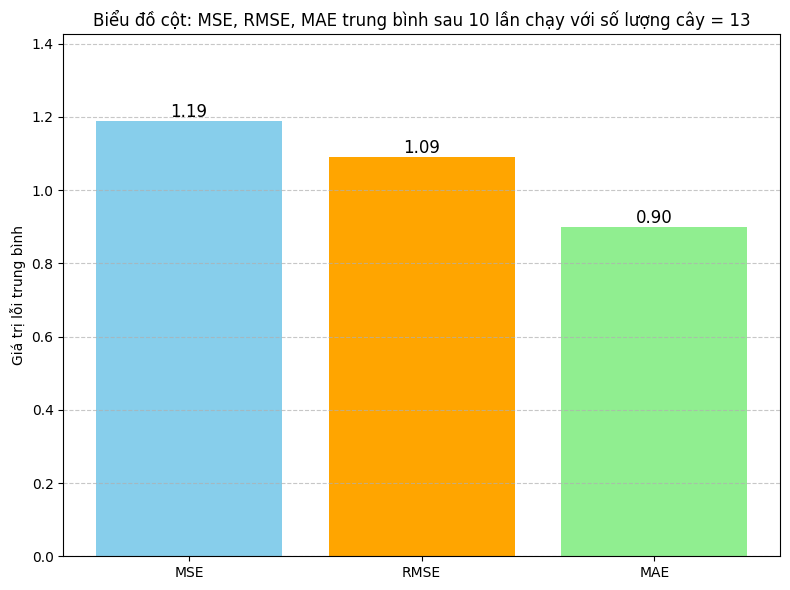

n_estimators = 13
Train Time: 0.4967350006103516
Test Time: 0.031763243675231936
Trung binh: RMSE = 1.0899 | MAE = 0.9003 | MSE = 1.1879


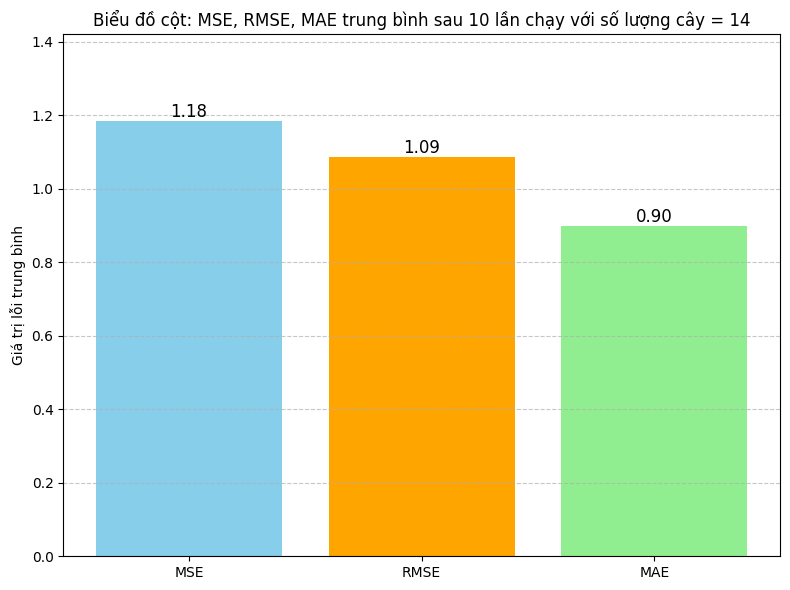

n_estimators = 14
Train Time: 0.3702647924423218
Test Time: 0.019753456115722656
Trung binh: RMSE = 1.0880 | MAE = 0.8978 | MSE = 1.1837


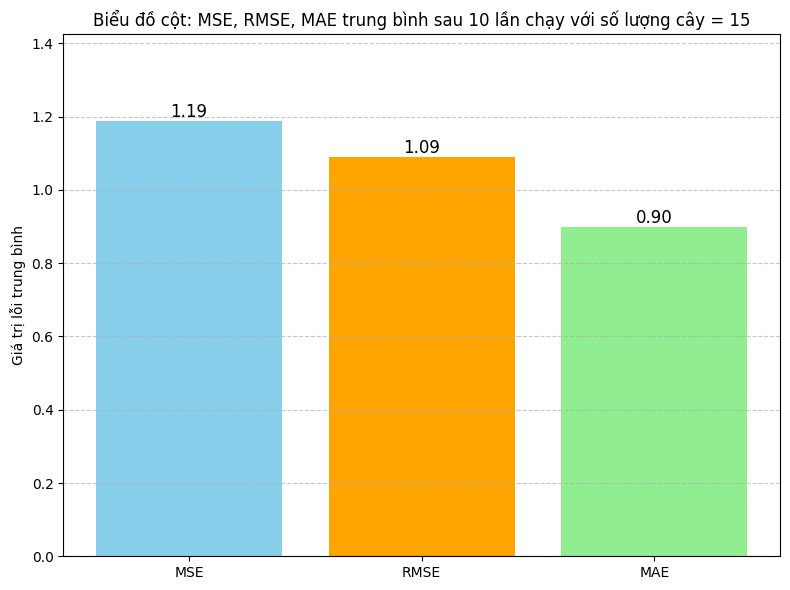

n_estimators = 15
Train Time: 0.4042158842086792
Test Time: 0.019918131828308105
Trung binh: RMSE = 1.0896 | MAE = 0.8976 | MSE = 1.1872


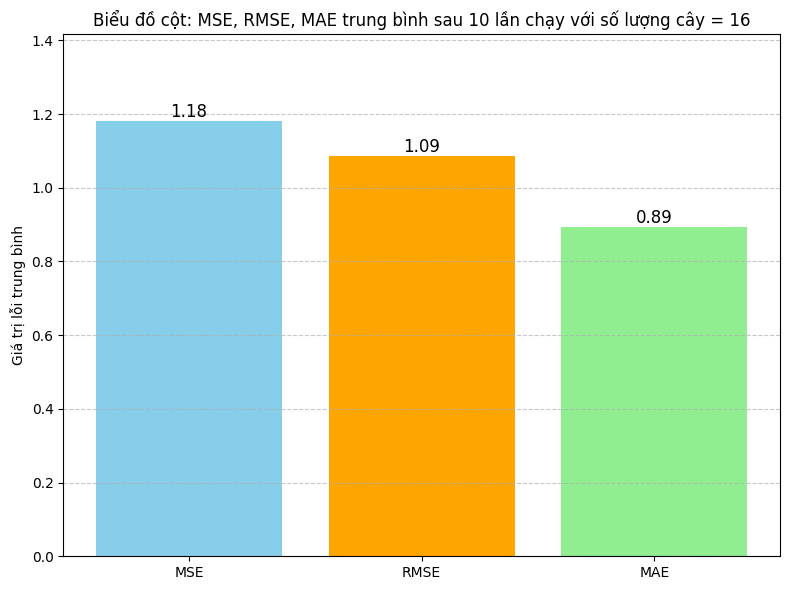

n_estimators = 16
Train Time: 0.4392235517501831
Test Time: 0.02096822261810303
Trung binh: RMSE = 1.0863 | MAE = 0.8947 | MSE = 1.1801


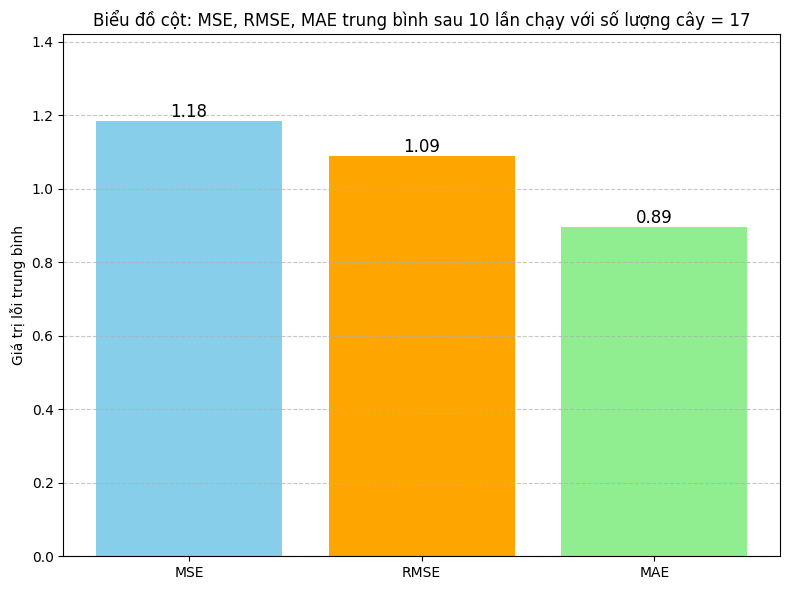

n_estimators = 17
Train Time: 0.4213230848312378
Test Time: 0.01809699535369873
Trung binh: RMSE = 1.0878 | MAE = 0.8950 | MSE = 1.1833


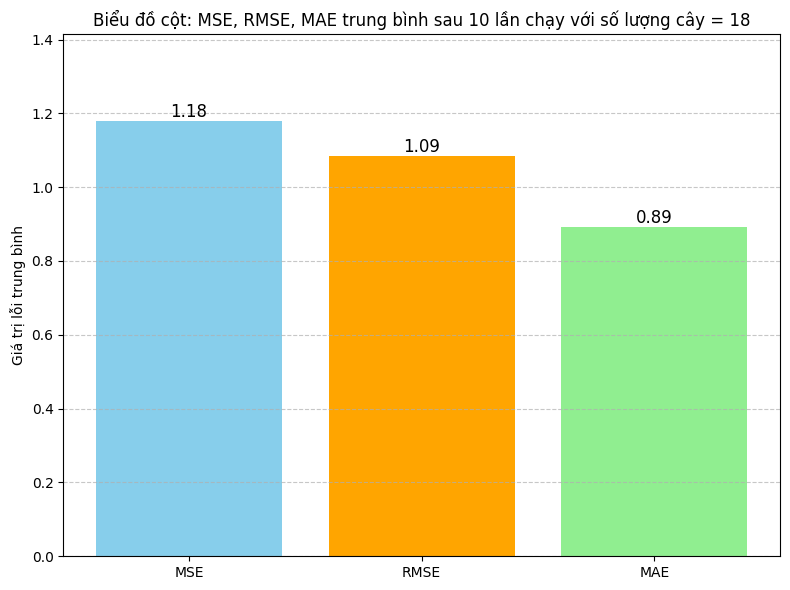

n_estimators = 18
Train Time: 1.4163097143173218
Test Time: 0.08583784103393555
Trung binh: RMSE = 1.0854 | MAE = 0.8925 | MSE = 1.1782


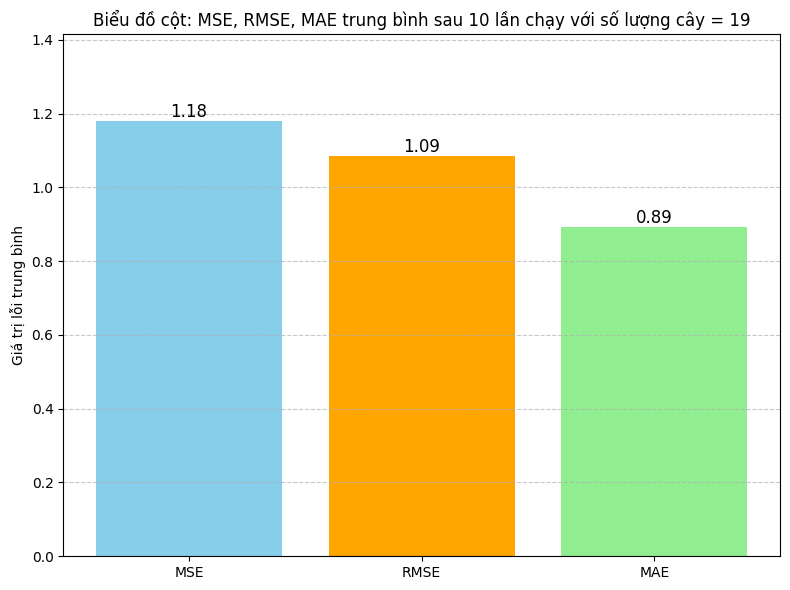

n_estimators = 19
Train Time: 0.9881163597106933
Test Time: 0.0408574104309082
Trung binh: RMSE = 1.0857 | MAE = 0.8921 | MSE = 1.1787


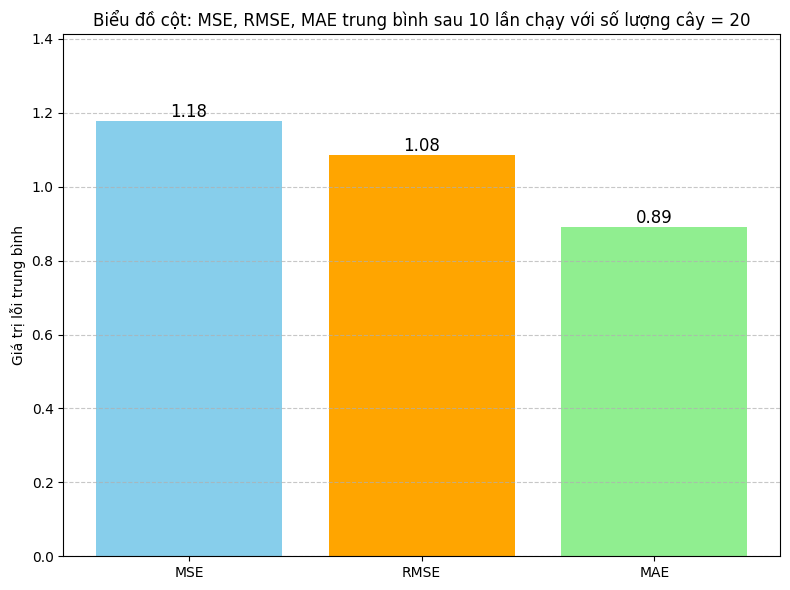

n_estimators = 20
Train Time: 0.8125716209411621
Test Time: 0.035792994499206546
Trung binh: RMSE = 1.0848 | MAE = 0.8904 | MSE = 1.1768


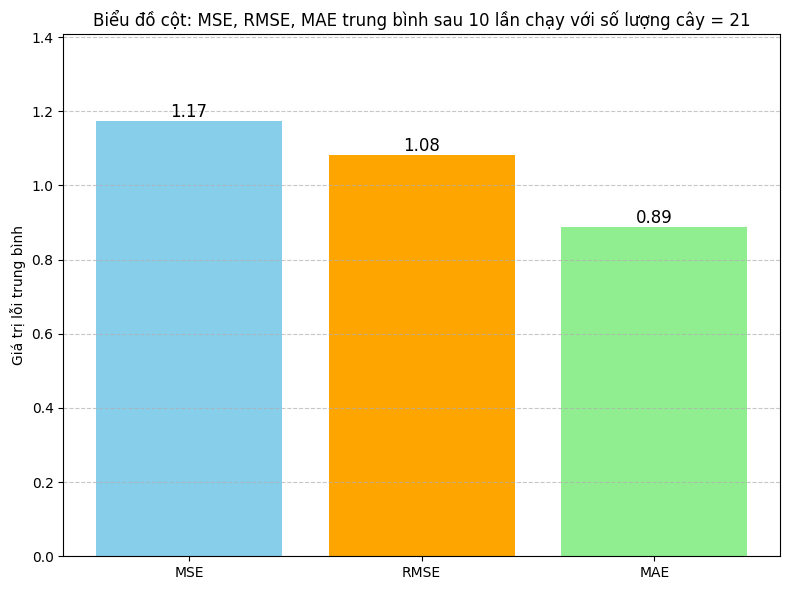

n_estimators = 21
Train Time: 1.2629228115081788
Test Time: 0.06894333362579345
Trung binh: RMSE = 1.0829 | MAE = 0.8887 | MSE = 1.1728


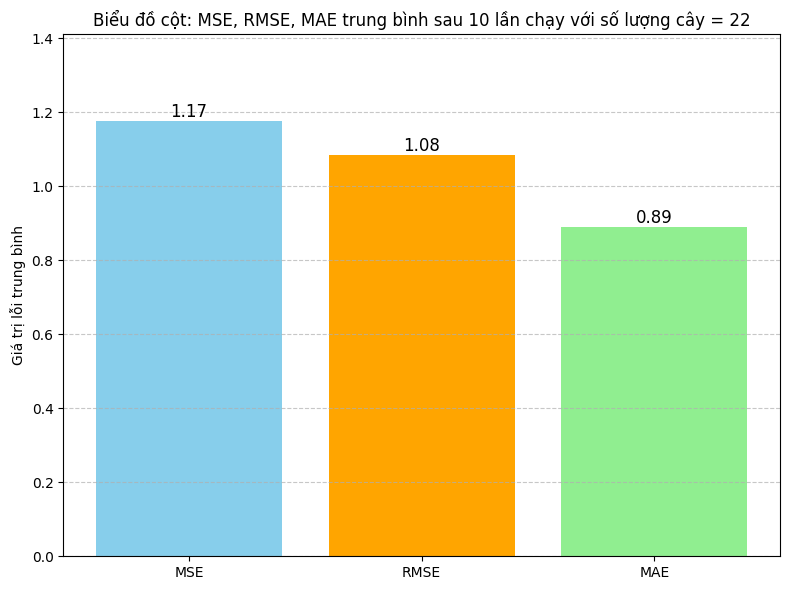

n_estimators = 22
Train Time: 1.2135937690734864
Test Time: 0.05296041965484619
Trung binh: RMSE = 1.0839 | MAE = 0.8890 | MSE = 1.1749


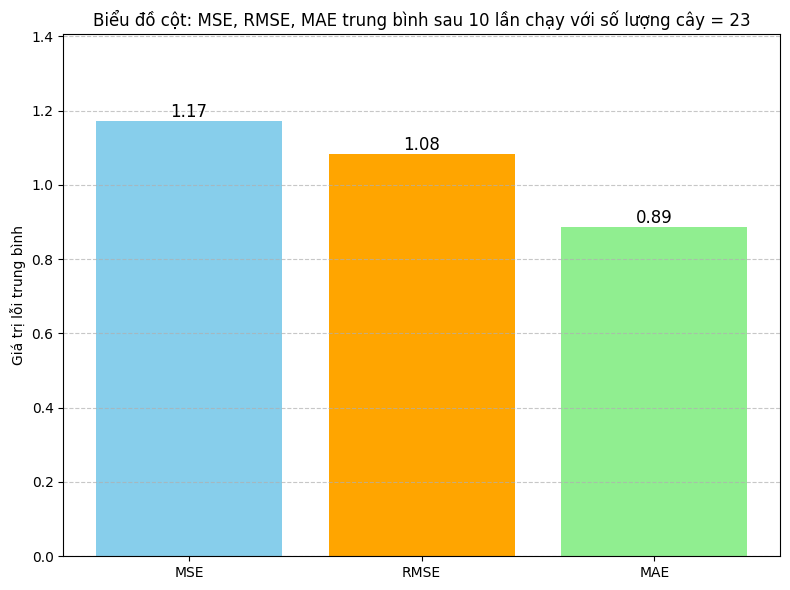

n_estimators = 23
Train Time: 1.6354102611541748
Test Time: 0.10093367099761963
Trung binh: RMSE = 1.0821 | MAE = 0.8870 | MSE = 1.1709


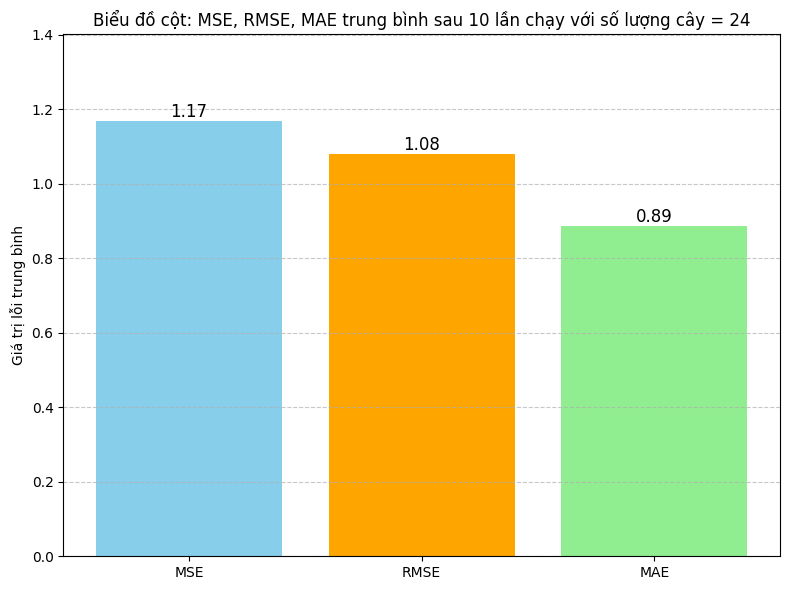

n_estimators = 24
Train Time: 1.2513178586959839
Test Time: 0.04652771949768066
Trung binh: RMSE = 1.0803 | MAE = 0.8856 | MSE = 1.1670


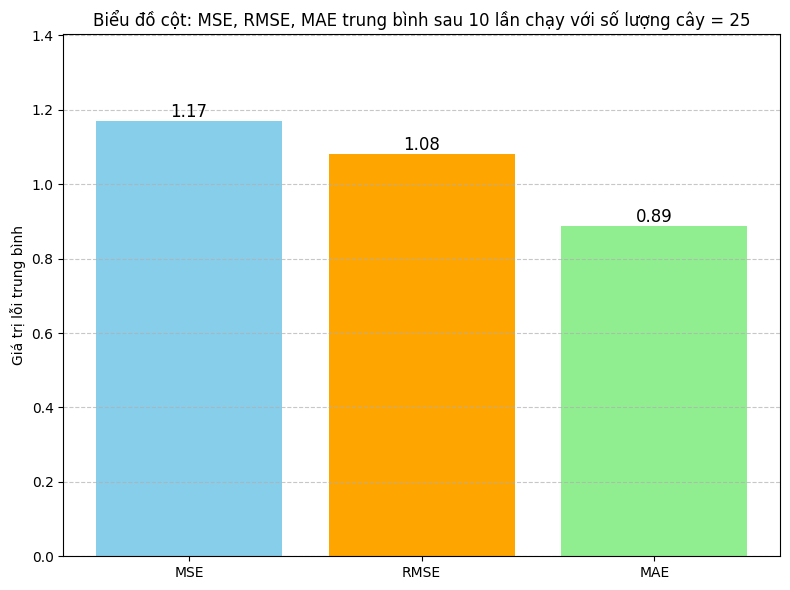

n_estimators = 25
Train Time: 1.4842084169387817
Test Time: 0.04750547409057617
Trung binh: RMSE = 1.0812 | MAE = 0.8866 | MSE = 1.1689


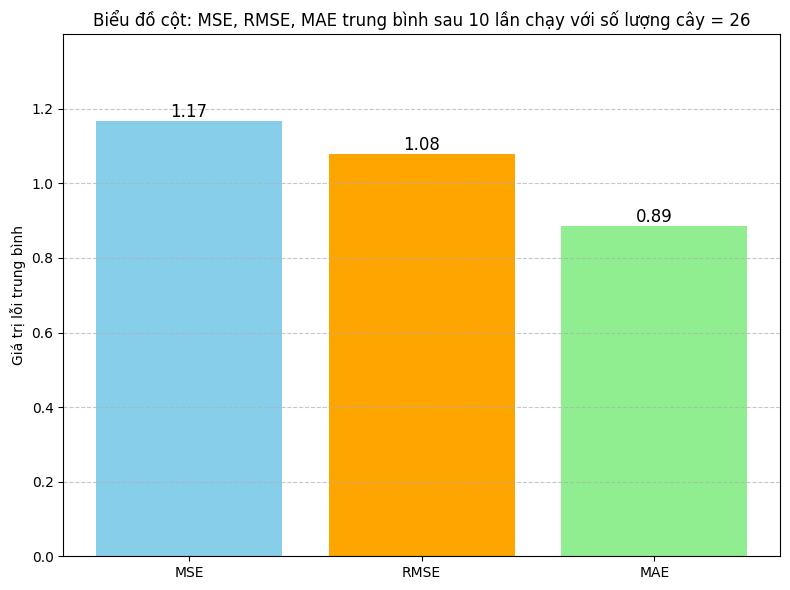

n_estimators = 26
Train Time: 1.949563217163086
Test Time: 0.07842855453491211
Trung binh: RMSE = 1.0798 | MAE = 0.8852 | MSE = 1.1661


In [22]:
import time
results = []
for N_estimators in range(6, 27):
    time_train = []
    time_test = []
    rmse_list = []
    mae_list = []
    mse_list = []
    for each in range(1, 11):  # Chạy 10 lần thử nghiệm
        combined = list(zip(X.values, y.values))
        # combined = list(zip(X, y))
        random.shuffle(combined)
        dulieu_X_shuffled, dulieu_Y_shuffled = zip(*combined)
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled, dulieu_Y_shuffled, test_size=1/3, random_state=125)

        # Huấn luyện mô hình KNN
        st = time.time()
        model = GradientBoostingRegressor(n_estimators=N_estimators, learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_Train, Y_Train)
        et = time.time() - st
        time_train.append(et)

        # Dự đoán và tính toán thời gian
        st = time.time()
        Y_Pred = model.predict(X_Test)
        et = time.time() - st
        time_test.append(et)

      
        gb_mse = mean_squared_error(Y_Test, Y_Pred)
        mse_list.append(gb_mse)
        gb_rmse = np.sqrt(gb_mse)
        rmse_list.append(gb_rmse)
        gb_mae = mean_absolute_error(Y_Test, Y_Pred)
        mae_list.append(gb_mae)

    # iterations = np.arange(1, 11)
    # plt.figure(figsize=(10, 6))
    # plt.plot(iterations, rmse_list, marker='o', label='RMSE')
    # plt.plot(iterations, mae_list, marker='s', label='MAE')
    # plt.plot(iterations, mse_list, marker='^', label='MSE')
    # plt.xlabel('Lần lặp')
    # plt.ylabel('Giá trị')
    # plt.title('Biểu đồ RMSE, MAE, MSE qua 10 lần lặp với số lượng cây = '+str(N_estimators))
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Tính trung bình thời gian train, test và MSE
    Ketqua_timeTrain = statistics.mean(time_train)
    Ketqua_timeTest = statistics.mean(time_test)

    Ketqua_mse = statistics.mean(mse_list)
    Ketqua_rmse = statistics.mean(rmse_list)
    Ketqua_mae = statistics.mean(mae_list)
    results.append((N_estimators, Ketqua_mse, Ketqua_rmse, Ketqua_mae))
    # Vẽ biểu đồ cột
    metrics = ['MSE', 'RMSE', 'MAE']
    values = [Ketqua_mse, Ketqua_rmse, Ketqua_mae]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'lightgreen'])

    # Hiển thị giá trị trên đầu cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=12)

    plt.ylabel('Giá trị lỗi trung bình')
    plt.title('Biểu đồ cột: MSE, RMSE, MAE trung bình sau 10 lần chạy với số lượng cây = '+str(N_estimators))
    plt.ylim(0, max(values) * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print(f"n_estimators = {N_estimators}")
    print(f"Train Time: {Ketqua_timeTrain}")
    print(f"Test Time: {Ketqua_timeTest}")
    print(f"Trung binh: RMSE = {Ketqua_rmse:.4f} | MAE = {Ketqua_mae:.4f} | MSE = {Ketqua_mse:.4f}")


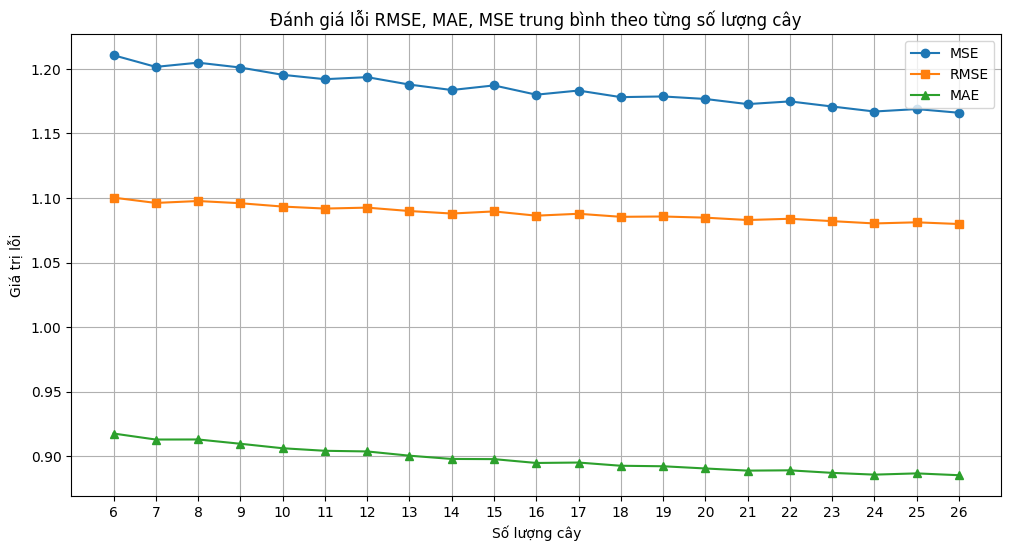

In [24]:

# Tách các giá trị để vẽ biểu đồ
ks = [r[0] for r in results]
mses = [r[1] for r in results]
rmses = [r[2] for r in results]
maes = [r[3] for r in results]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

plt.plot(ks, mses, marker='o', label='MSE')
plt.plot(ks, rmses, marker='s', label='RMSE')
plt.plot(ks, maes, marker='^', label='MAE')

plt.title("Đánh giá lỗi RMSE, MAE, MSE trung bình theo từng số lượng cây")
plt.xlabel("Số lượng cây")
plt.ylabel("Giá trị lỗi")
plt.xticks(ks)
plt.grid(True)
plt.legend()
plt.show()

In [7]:
import time
results_d = []
for N_d in range(2, 23):
    time_train = []
    time_test = []
    rmse_list = []
    mae_list = []
    mse_list = []
    for each in range(1, 11):  # Chạy 10 lần thử nghiệm
        combined = list(zip(X.values, y.values))
        random.shuffle(combined)
        dulieu_X_shuffled, dulieu_Y_shuffled = zip(*combined)
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled, dulieu_Y_shuffled, test_size=1/3, random_state=125)

        # Huấn luyện mô hình KNN
        st = time.time()
        model = GradientBoostingRegressor(n_estimators=26, learning_rate=0.1, max_depth=N_d, random_state=42)
        model.fit(X_Train, Y_Train)
        et = time.time() - st
        time_train.append(et)

        # Dự đoán và tính toán thời gian
        st = time.time()
        Y_Pred = model.predict(X_Test)
        et = time.time() - st
        time_test.append(et)

      
        gb_mse = mean_squared_error(Y_Test, Y_Pred)
        mse_list.append(gb_mse)
        gb_rmse = np.sqrt(gb_mse)
        rmse_list.append(gb_rmse)
        gb_mae = mean_absolute_error(Y_Test, Y_Pred)
        mae_list.append(gb_mae)

    # Tính trung bình thời gian train, test và MSE
    Ketqua_timeTrain = statistics.mean(time_train)
    Ketqua_timeTest = statistics.mean(time_test)

    Ketqua_mse = statistics.mean(mse_list)
    Ketqua_rmse = statistics.mean(rmse_list)
    Ketqua_mae = statistics.mean(mae_list)
    results_d.append((N_d, Ketqua_mse, Ketqua_rmse, Ketqua_mae))
    # # Vẽ biểu đồ cột
    # metrics = ['MSE', 'RMSE', 'MAE']
    # values = [Ketqua_mse, Ketqua_rmse, Ketqua_mae]

    # plt.figure(figsize=(8, 6))
    # bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'lightgreen'])

    # # Hiển thị giá trị trên đầu cột
    # for bar in bars:
    #     height = bar.get_height()
    #     plt.text(bar.get_x() + bar.get_width() / 2, height,
    #             f'{height:.2f}', ha='center', va='bottom', fontsize=12)

    # plt.ylabel('Giá trị lỗi trung bình')
    # plt.title('Biểu đồ cột: MSE, RMSE, MAE trung bình sau 10 lần chạy với số lượng cây = '+str(N_estimators))
    # plt.ylim(0, max(values) * 1.2)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.tight_layout()
    # plt.show()
    print(f"n_d = {N_d}")
    print(f"Train Time: {Ketqua_timeTrain}")
    print(f"Test Time: {Ketqua_timeTest}")
    print(f"Trung binh: RMSE = {Ketqua_rmse:.4f} | MAE = {Ketqua_mae:.4f} | MSE = {Ketqua_mse:.4f}")


n_d = 2
Train Time: 1.4434555053710938
Test Time: 0.09058337211608887
Trung binh: RMSE = 1.0916 | MAE = 0.8997 | MSE = 1.1917
n_d = 3
Train Time: 0.8943183183670044
Test Time: 0.03837034702301025
Trung binh: RMSE = 1.0805 | MAE = 0.8848 | MSE = 1.1676
n_d = 4
Train Time: 1.4420049428939818
Test Time: 0.04973015785217285
Trung binh: RMSE = 1.0692 | MAE = 0.8746 | MSE = 1.1432
n_d = 5
Train Time: 1.181943917274475
Test Time: 0.03023552894592285
Trung binh: RMSE = 1.0588 | MAE = 0.8627 | MSE = 1.1211
n_d = 6
Train Time: 1.9647284746170044
Test Time: 0.06485652923583984
Trung binh: RMSE = 1.0476 | MAE = 0.8520 | MSE = 1.0974
n_d = 7
Train Time: 3.8910979509353636
Test Time: 0.12896463871002198
Trung binh: RMSE = 1.0383 | MAE = 0.8417 | MSE = 1.0781
n_d = 8
Train Time: 2.8057621479034425
Test Time: 0.07545509338378906
Trung binh: RMSE = 1.0290 | MAE = 0.8324 | MSE = 1.0589
n_d = 9
Train Time: 2.938934636116028
Test Time: 0.08437156677246094
Trung binh: RMSE = 1.0175 | MAE = 0.8211 | MSE = 1

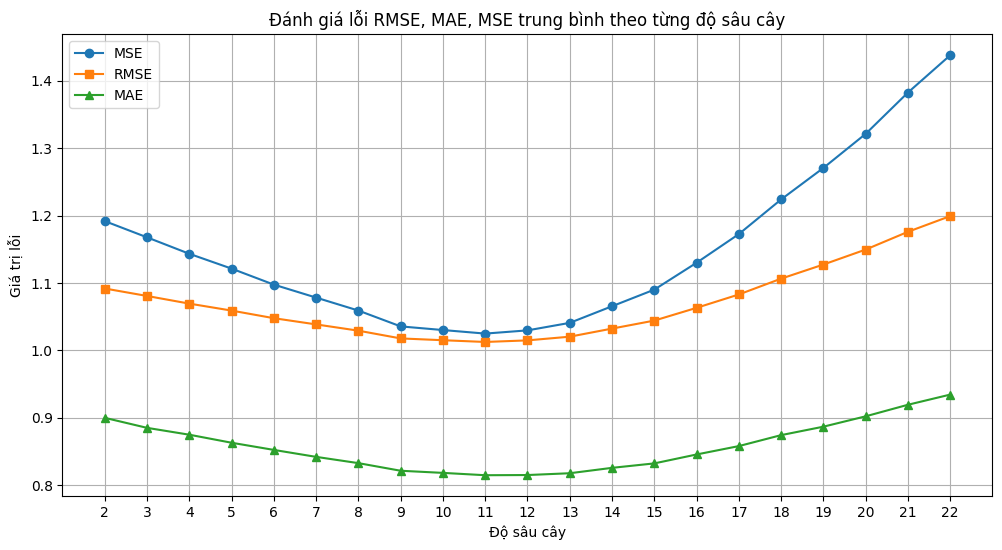

In [8]:

# Tách các giá trị để vẽ biểu đồ
ds = [r[0] for r in results_d]
mses = [r[1] for r in results_d]
rmses = [r[2] for r in results_d]
maes = [r[3] for r in results_d]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

plt.plot(ds, mses, marker='o', label='MSE')
plt.plot(ds, rmses, marker='s', label='RMSE')
plt.plot(ds, maes, marker='^', label='MAE')

plt.title("Đánh giá lỗi RMSE, MAE, MSE trung bình theo từng độ sâu cây")
plt.xlabel("Độ sâu cây")
plt.ylabel("Giá trị lỗi")
plt.xticks(ds)
plt.grid(True)
plt.legend()
plt.show()